<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Visualizing_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import upsetplot

In [19]:
pip install UpSetPlot

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/nypd-motor-vehicle-collisions.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


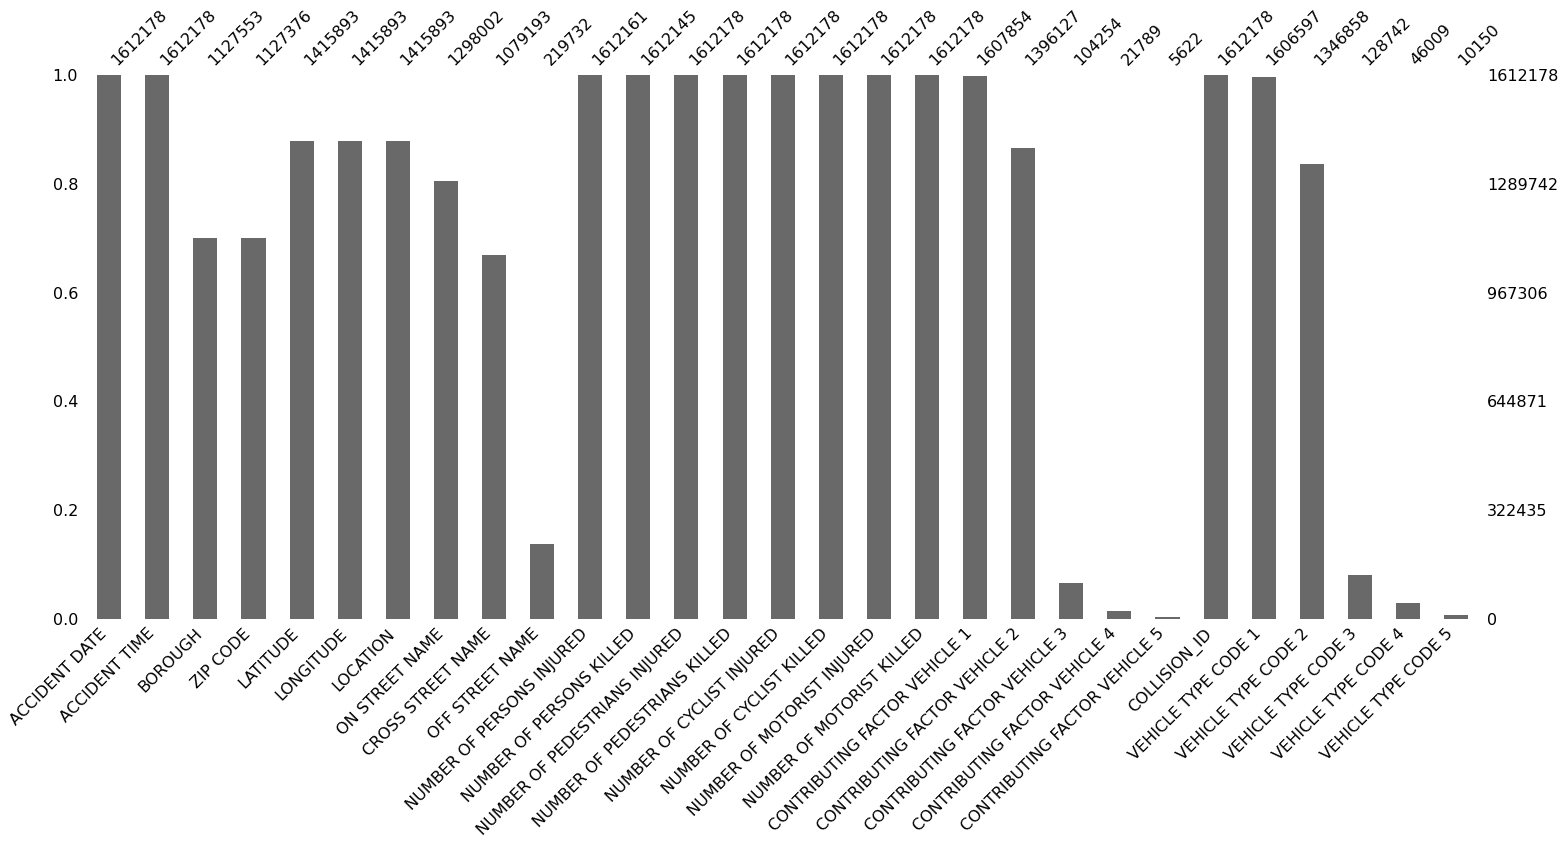

In [21]:
# Visualizing missing values¶
# Bar chart
# This shows the proportion of non-missing values per columns

msno.bar(df)

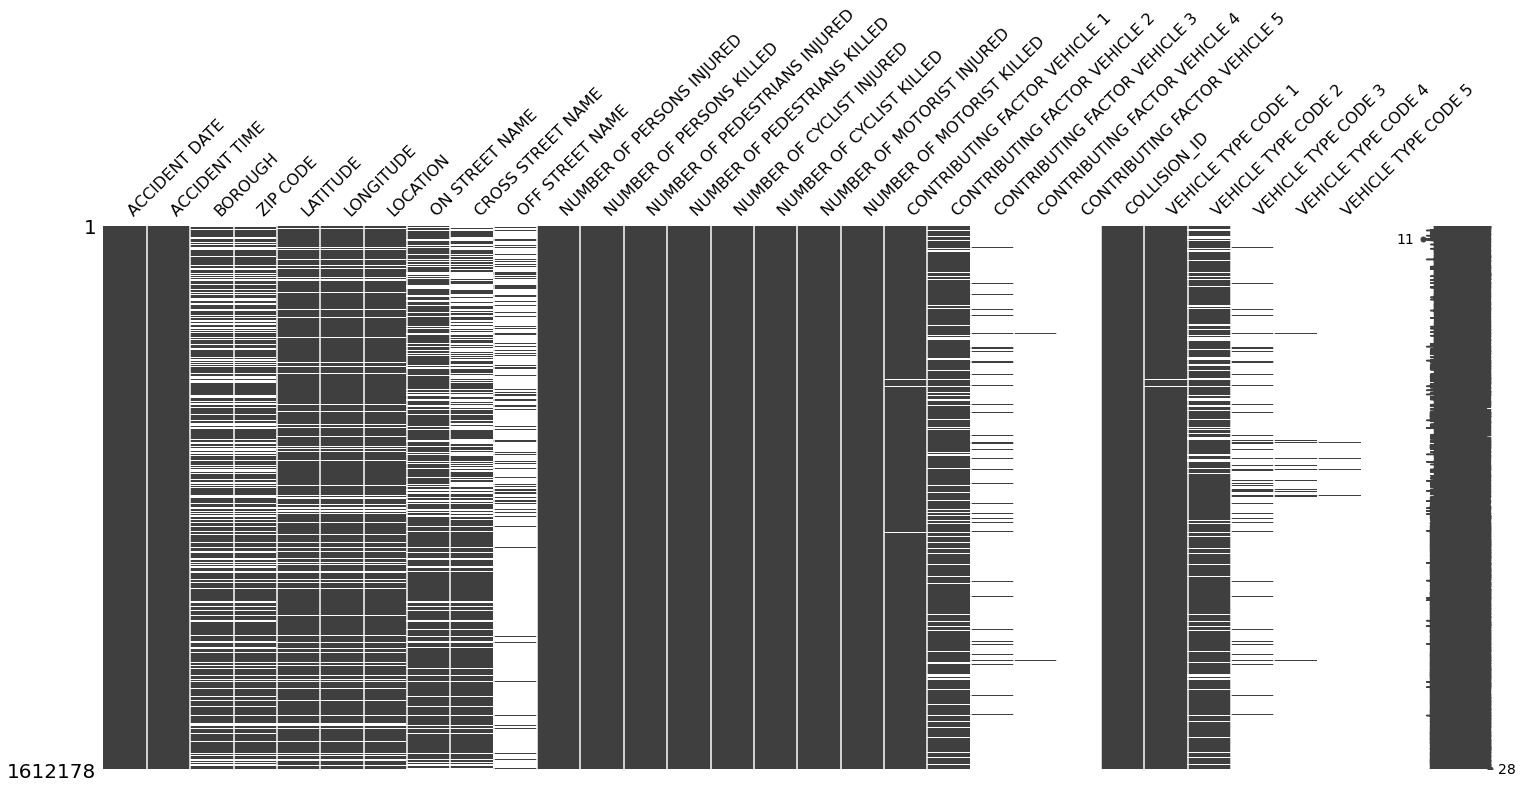

In [22]:
# Matrix¶
# Visualizes the missing values (white) per rows and columns

msno.matrix(df)

In [23]:
# Exploring when missing values appear together¶
# First we create a dataframe that indicates whether the values are missing or not

is_null_df = df.isnull()
is_null_df.head()

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True
1,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True


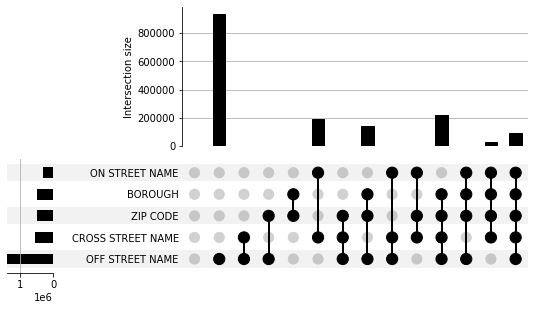

In [24]:
upsetplot.plot(
    is_null_df.groupby([
        'BOROUGH', 'ZIP CODE', 'ON STREET NAME','CROSS STREET NAME','OFF STREET NAME',
        #'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
        #'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
        #'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
        #'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
        #'VEHICLE TYPE CODE 5'
    ]).size()
);

In [25]:
missing_values_frequency_matrix = pd.DataFrame(
    np.zeros(shape=(is_null_df.shape[1],is_null_df.shape[1])),
    index=is_null_df.columns,
    columns=is_null_df.columns,
)
for i in range(0, is_null_df.shape[1] - 1):
    for j in range(i + 1, is_null_df.shape[1]):
        try:
            missing_values_frequency_matrix.iloc[i,j] = jaccard_score(is_null_df.iloc[:,i], is_null_df.iloc[:,j])
        except:
            pass

In [26]:
missing_values_frequency_matrix

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
ACCIDENT DATE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCIDENT TIME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BOROUGH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZIP CODE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LATITUDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LONGITUDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOCATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ON STREET NAME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CROSS STREET NAME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OFF STREET NAME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


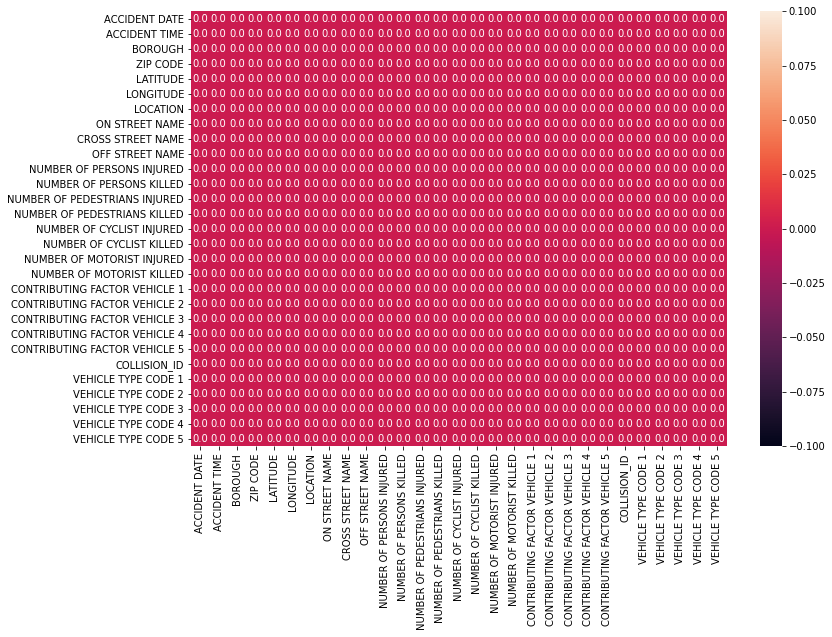

In [27]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(missing_values_frequency_matrix.T, ax=ax, annot=True, fmt='.1f', annot_kws={"size": 10})

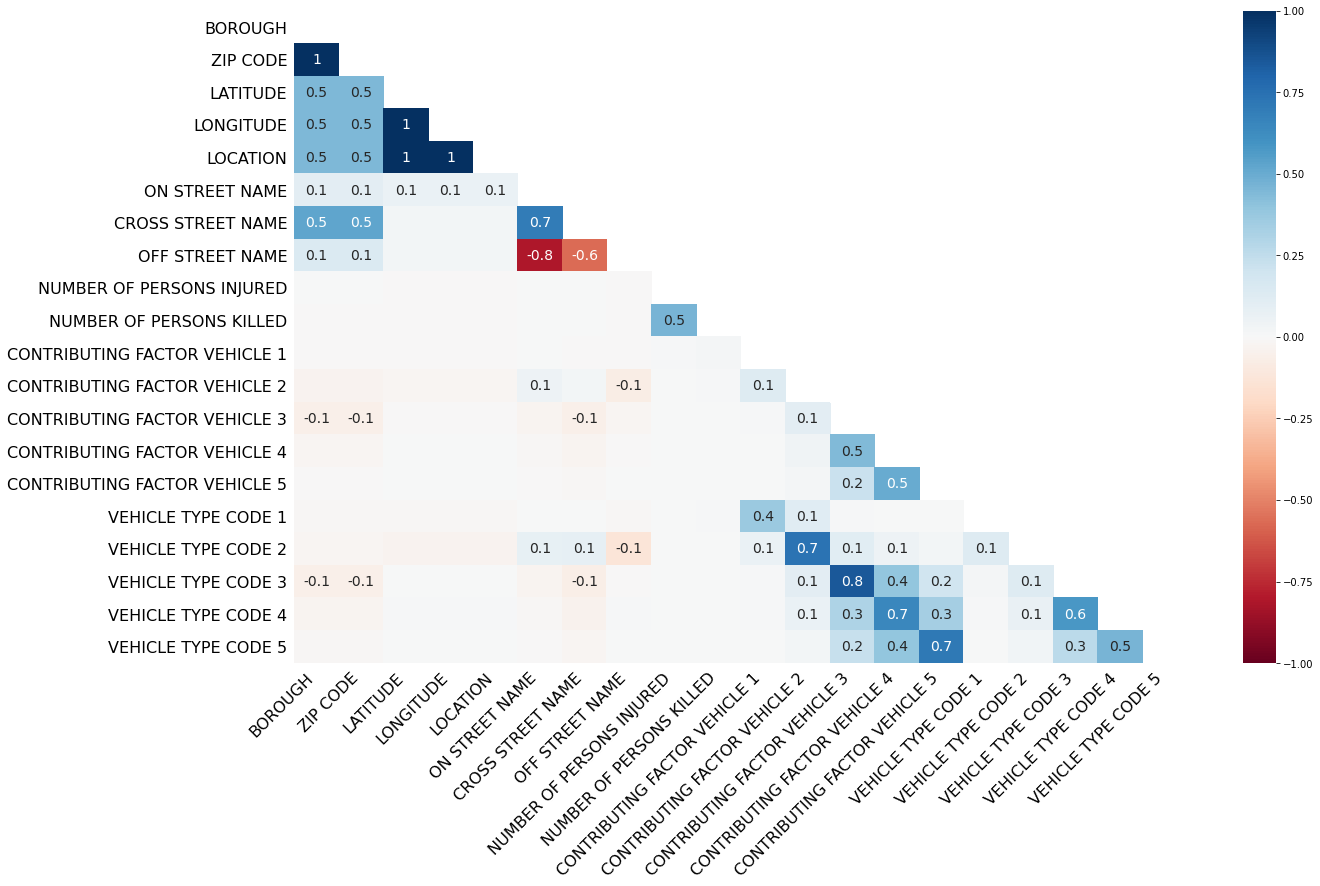

In [28]:
# Correlation Heatmap
# Computing pearson correlation on missing values matrix

msno.heatmap(df)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
